# Optimisation for Machine Learning

October 05, 2023

### Logistic
Contact: [Clement Royer](mailto:clement.royer@lamsade.dauphine.fr)
Lecture's web: [URL](https://www.lamsade.dauphine.fr/%7Ecroyer/teachOAA.html)
Examen: 60% (2h), dated December 13, 2023 10:00 AM - 12:00 PM
Project: 40%, during from October 6, 2023 to December 23, 2023

In [21]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')
plt.rc('text', usetex=True)
plt.rc('font', family='sans-serif')
plt.rc('font', size=14)
plt.rc('axes', titlesize=14)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('legend', fontsize=14)
plt.rc('lines', markersize=10)

## Non-smooth optimization and regularization

About what can we do if we don't have gradient?
How can we guarantee that a solution has a specific structure/property?

#### Optimizing without gradients

$$ \min_{w \in \mathbb{R}^d} f(w) \text{ with } f: \mathbb{R}^d \rightarrow \mathbb{R}$$
So far we have assumed that $f$ was $C^1$ and that we could compute its gradient $\nabla f$.
But many problems involve functions that are not differentiable, or for which the gradient is not available in certain points.

**Example:** $f(w) = |w| \in \mathbb{R}$ is not differentiable at $w=0$.

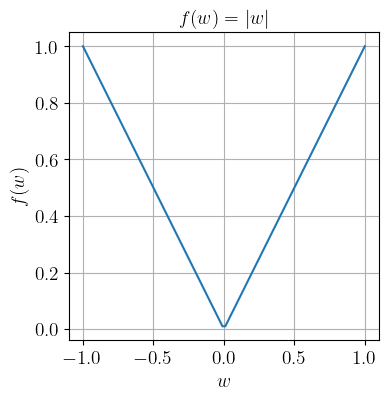

In [22]:
def f(w):
    return np.abs(w)
fig, ax = plt.subplots(figsize=(4, 4))
w = np.linspace(-1, 1, 100)
ax.plot(w, f(w))
ax.set_xlabel(r'$w$')
ax.set_ylabel(r'$f(w)$')
ax.set_title(r'$f(w) = |w|$')
ax.grid(True)
plt.show()

**Definition:** A function $f: \mathbb{R}^d \rightarrow \mathbb{R}$ is non-smooth if there exists a vector $w \in \mathbb{R}^d$ such that $f$ is not differentiable at $w$.

**Remark**: A non-smooth function need to be discontinuous. 

We will focus on the case where $f$ is convex non-smooth. That is necessary continuous.

**Definition:** Let $f: \mathbb{R}^d \rightarrow \mathbb{R}$ be a convex function (hence continuous) function and let $w \in \mathbb{R}^d$. A vector $g \in \mathbb{R}^d$ is called a subgradient of $f$ at $w$ if for all $v \in \mathbb{R}^d$, we have:
$$ f(v) \geq f(w) + g^T(v-w)$$
The set of all subgradients of $f$ at $w$ is called the subdifferential of $f$ at $w$ and is denoted by $\partial f(w) \subset \mathbb{R}^d$.

For $\mathcal{C}^1$ convex $f$, we have $f(v) \geq f(w) + \nabla f(w)^T(v-w)$ for all $v \in \mathbb{R}^d$.
In that case, $\partial f(w) = \{\nabla f(w)\}$.

**Theorem**: If $f: \mathbb{R}^d \rightarrow \mathbb{R}$ is non-smooth convex, then:
$$
[\bar{w} \in \mathbb{R}^d \text{ is a minimizer of } f] \Leftrightarrow [0_{\mathbb{R}^d} \in \partial f(\bar{w})]
$$

Generalization of the $\mathcal{C}^1$ equivalent when $f$ is $\mathcal{C}^1$: $\partial f(\bar{w}) = \{\nabla f(\bar{w})\}$.
Using the notion of subgradient, we can build a class of algorithms for minimizing non-smooth convex functions. $\Rightarrow$ Subgradient methods.

Basic subgradient method iteration:
$$
\forall k \geq 0, \quad w_{k+1} = w^k - \alpha_k g_k
$$
where $g_k \in \partial f(w^k)$ and $\alpha_k > 0$ is a stepsize.
This is the GD iteration when $\partial f(w^k) = \{\nabla f(w^k)\}$.